Importing Required Libraries

In [58]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from numpy import sqrt

Gathering and Observing Data

In [59]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df_copy = df.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [60]:
df_copy.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [61]:
df_copy.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Exploratory Data Analysis

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [63]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [64]:
numeric_columns = df_copy.select_dtypes(include=['number']).columns
categorical_columns=df_copy.select_dtypes(include=['object']).columns

In [65]:
for col in numeric_columns:
  z_scores=(df_copy[col] - df_copy[col].mean())/df_copy[col].std()
  outliers=(z_scores < -3) & (z_scores > 3)
  df_copy[col][outliers] = np.nan


<ipython-input-65-e39bc27908ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col][outliers] = np.nan


In [66]:
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [67]:
categorical_columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [68]:
numeric_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy1 = df.copy()

for i in categorical_columns:
  df_copy1[i]=label_encoder.fit_transform(df_copy1[i])
df_copy1

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,NaN,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.80140,144.99580,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.79960,144.99840,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.80790,144.99340,2,4019.0
3,0,9768,3,2,NaN,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.81140,145.01160,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.80930,144.99440,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,348,5862,4,0,1480000.0,0,152,38,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,16,-37.81053,144.88467,6,6543.0
34853,348,16982,2,0,888000.0,5,321,38,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,16,-37.81551,144.88826,6,6543.0
34854,348,7350,2,1,705000.0,2,152,38,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,16,-37.82286,144.87856,6,6543.0
34855,348,5421,3,0,1140000.0,5,370,38,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,6,6543.0


In [70]:
df_copy1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          0
Lattitude         7976
Longtitude        7976
Regionname           0
Propertycount        3
dtype: int64

<Axes: >

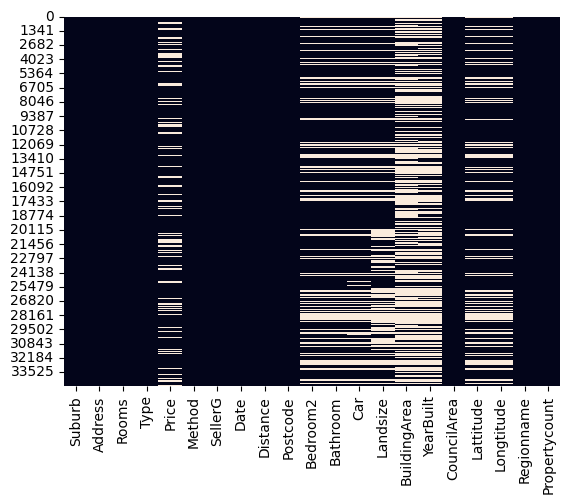

In [71]:
sns.heatmap(df_copy1.isnull(),cbar=False)

In [72]:
df_copy1.drop(columns=["Postcode", "Landsize", "BuildingArea", "Lattitude", "Longtitude", "Propertycount"], inplace=True)
YearBuilt_mode=df_copy1["YearBuilt"].fillna(df_copy1["YearBuilt"].mode().iloc[0])
df_copy1["YearBuilt"].fillna(YearBuilt_mode, inplace=True)
Bedroom2_mode=df_copy1["Bedroom2"].fillna(df_copy1["Bedroom2"].mode().iloc[0])
df_copy1["Bedroom2"].fillna(Bedroom2_mode, inplace=True)
Bathroom_mode=df_copy1["Bathroom"].fillna(df_copy1["Bathroom"].mode().iloc[0])
df_copy1["Bathroom"].fillna(Bathroom_mode, inplace=True)
distance_mode=df_copy1["Distance"].fillna(3060)
df_copy1["Distance"].fillna(distance_mode, inplace=True)


In [73]:
Price_mode=df_copy1["Price"].fillna(df_copy1["Price"].mode().iloc[0])
df_copy1["Price"].fillna(Price_mode, inplace=True)

In [74]:
Car_mode=df_copy1["Car"].fillna(df_copy1["Car"].mode().iloc[0])
df_copy1["Car"].fillna(Car_mode, inplace=True)

In [75]:
df_copy1.isnull().sum()

Suburb         0
Address        0
Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Date           0
Distance       0
Bedroom2       0
Bathroom       0
Car            0
YearBuilt      0
CouncilArea    0
Regionname     0
dtype: int64

<Axes: >

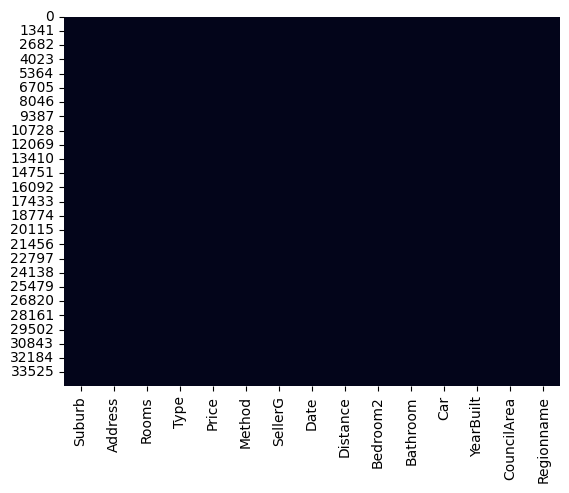

In [76]:
sns.heatmap(df_copy1.isnull(),cbar=False)

Data Visualization

<Axes: xlabel='Price', ylabel='Count'>

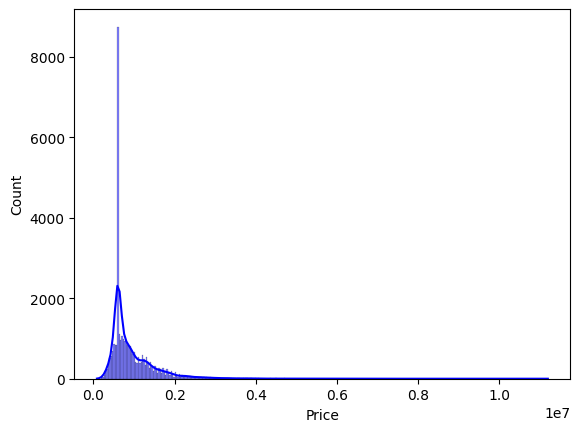

In [77]:
sns.histplot(data=df_copy1["Price"], kde=True, color="blue")


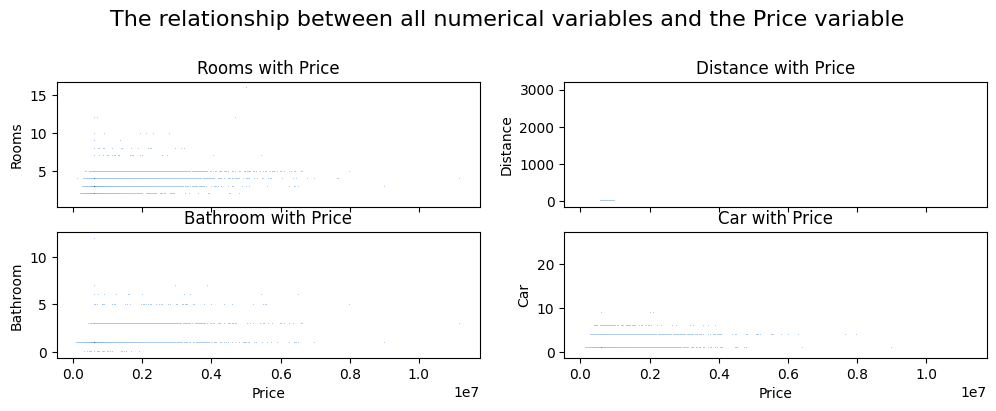

In [78]:
# Creates histogram to the relationships between numerical columns with price
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12,4))
plt.subplots_adjust(top=0.80)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=16)
axes[0,0].set_title('Rooms with Price')
sns.histplot(ax=axes[0,0], data=df_copy1, x="Price", y="Rooms")

axes[0,1].set_title('Distance with Price')
sns.histplot(ax=axes[0,1], data=df_copy1, x="Price", y="Distance")

axes[1,0].set_title('Bathroom with Price')
sns.histplot(ax=axes[1,0], data=df_copy1, x="Price", y="Bathroom")

axes[1,1].set_title('Car with Price')
sns.histplot(ax=axes[1,1], data=df_copy1, x="Price", y="Car")
plt.savefig('relationship_with_price.png')

<Axes: >

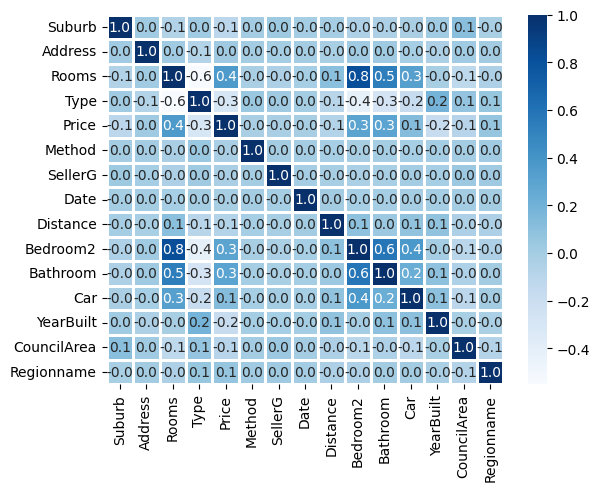

In [79]:
df_copy1.corr(numeric_only=True).T
df_copy1.corrwith(other=df_copy1["Price"], numeric_only=True)
# Correlation Matrix
sns.heatmap(df_copy1.corr(numeric_only=True).T,cmap="Blues", fmt=".1f",annot=True, linewidths=1,)

Model Selection

The input data (x,regressor)

In [80]:
x = df_copy1.drop(columns='Price', axis=1)

In [81]:
x.shape

(34857, 14)

In [82]:
print(x)

       Suburb  Address  Rooms  Type  Method  SellerG  Date  Distance  \
0           0    29458      2     0       6      155    58       2.5   
1           0    32512      2     0       2       33    60       2.5   
2           0    15389      2     0       2       33    63       2.5   
3           0     9768      3     2       7      296    63       2.5   
4           0    25128      3     0       5       33    64       2.5   
...       ...      ...    ...   ...     ...      ...   ...       ...   
34852     348     5862      4     0       0      152    38       6.3   
34853     348    16982      2     0       5      321    38       6.3   
34854     348     7350      2     1       2      152    38       6.3   
34855     348     5421      3     0       5      370    38       6.3   
34856     348    17743      2     0       0      276    38       6.3   

       Bedroom2  Bathroom  Car  YearBuilt  CouncilArea  Regionname  
0           2.0       1.0  1.0     1970.0           31           2

The output data(y,predictor)

In [83]:
y = df_copy1['Price']

In [84]:
y.shape

(34857,)

In [85]:
print(y)

0         600000.0
1        1480000.0
2        1035000.0
3         600000.0
4        1465000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 34857, dtype: float64


In [86]:
print(type(y))

<class 'pandas.core.series.Series'>


splitting the dataset              

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Exploring the train and test datasets

In [88]:
print('Shape of X_train is {}'.format(x_train.shape))
print('Shape of X_test is {}'.format(x_test.shape))

Shape of X_train is (27885, 14)
Shape of X_test is (6972, 14)


In [89]:
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of y_train is (27885,)
Shape of y_test is (6972,)


In [90]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
import sklearn.ensemble
from sklearn.ensemble import AdaBoostRegressor

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
def regression_models(x,y,predict_test):

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreesRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()

    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet', 'ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    mse=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE','MSE'],index=algo_names)

    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        mse.append(mean_squared_error(y_test,item.predict(x_test)))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    result.MSE=mse

    return result.sort_values('R_Squared',ascending=False)

In [92]:
regression_models(x,y,predict_test=x_test)

,R_Squared,RMSE,MAE,MSE
GradientBoostingRegressor,0.388082,447814.719811,274319.858373,2.005380e+11
ExtraTreeRegressor,0.362166,457199.521448,264880.954951,2.090314e+11
Ridge,0.190085,515195.007393,350961.861685,2.654259e+11
LinearRegression,0.190084,515195.234249,350962.363823,2.654261e+11
Lasso,0.190084,515195.237533,350962.222392,2.654261e+11
ElasticNet,0.180179,518336.109268,355083.747348,2.686723e+11
KNeighborsRegressor,-0.017511,577459.281389,393766.532042,3.334592e+11


1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error(MAE)
3. Mean squared error(MSE)
**R^2**
what R-squared does:Compares your models predictions to the mean of the targets.Values can range from negative infinity(a very poor model) to 1. For example,if all your model does it predict the mean of the targets,it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**R^2 (pronounced r-squared) or coefficient of determination**

**Mean absolue error(MAE)**                        
MAE is the average of the abostute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

**Mean squared error (MSE)**

COMMENTS
